## Problem Statement
Pick up the following stocks and generate forecasts accordingly  

Stocks:  
1. NASDAQ.AAPL    
2. NASDAQ.ADP  
3. NASDAQ.CBOE  
4. NASDAQ.CSCO  
5. NASDAQ.EBAY

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from pandas.tools.plotting import autocorrelation_plot  
from statsmodels.graphics.tsaplots import plot_pacf  
from statsmodels.tsa.arima_model import ARIMA, ARMAResults  
import datetime  
import sys  
import seaborn as sns  
import statsmodels
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from matplotlib import pyplot

## Load the data

In [35]:
# Reading the data from csv file
df=pd.read_csv('data_stocks.csv')

In [36]:
# Checking the first 5 rows
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [37]:
# Data columns
df.columns

Index(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM', 'NASDAQ.ALXN',
       ...
       'NYSE.WYN', 'NYSE.XEC', 'NYSE.XEL', 'NYSE.XL', 'NYSE.XOM', 'NYSE.XRX',
       'NYSE.XYL', 'NYSE.YUM', 'NYSE.ZBH', 'NYSE.ZTS'],
      dtype='object', length=502)

In [38]:
# Converting timestamp to datetime
df.DATE= [datetime.fromtimestamp(x) for x in df.DATE]

In [39]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 19:00:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 19:01:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 19:02:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 19:03:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 19:04:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41266 entries, 0 to 41265
Columns: 502 entries, DATE to NYSE.ZTS
dtypes: datetime64[ns](1), float64(501)
memory usage: 158.0 MB


In [41]:
df.describe()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,43.291988,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,2.448582,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,37.460000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,41.690000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,43.650000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,44.935000,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,47.830000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [42]:
# Taking the 5 stocks and date column which needs to be analysed
Columns=['DATE','NASDAQ.AAPL','NASDAQ.ADP','NASDAQ.CBOE','NASDAQ.CSCO','NASDAQ.EBAY']
df_stocks=df[Columns]
df_stocks.head()

,DATE,NASDAQ.AAPL,NASDAQ.ADP,NASDAQ.CBOE,NASDAQ.CSCO,NASDAQ.EBAY
0,2017-04-03 19:00:00,143.6800,102.2300,81.03,33.7400,33.3975
1,2017-04-03 19:01:00,143.7000,102.1400,81.21,33.8800,33.3950
2,2017-04-03 19:02:00,143.6901,102.2125,81.21,33.9000,33.4100
3,2017-04-03 19:03:00,143.6400,102.1400,81.13,33.8499,33.3350
4,2017-04-03 19:04:00,143.6600,102.0600,81.12,33.8400,33.4000


In [43]:
# All the stocks are having multiple entries for each day, So convert stock dataset which will be having  Open, Closse, High and Low price for any perticular day 
df_list1 = {}
df_list2 = {}

for col in df_stocks.columns[1:]:
    df_col = col.split('.')[1]
    Open = df_stocks.groupby([df_stocks['DATE'].dt.date])[col].first()
    Low = df_stocks.groupby([df_stocks['DATE'].dt.date])[col].min()
    High = df_stocks.groupby([df_stocks['DATE'].dt.date])[col].max()
    Close = df_stocks.groupby([df_stocks['DATE'].dt.date])[col].last()
        
    df1 = pd.DataFrame([Open,Close,Low,High])
    df2 = pd.DataFrame([Close])
    
    df1 = df1.transpose()
    df2 = df2.transpose()
    
    df1.columns = ['Open','Low','High','Close']
    df2.columns = [df_col]
    
    df_list1[df_col] = df1
    df_list2[df_col] = df2

In [44]:
# Storing the dictionary values into a dataframe
df_new = df_list2['AAPL'].reset_index()
for item in df_list2.keys():
    df_new = pd.merge(df_new,df_list2[item].reset_index())
df_new.index = df_new['DATE']
df_new = df_new.drop('DATE', axis=1)

In [45]:
df_new.head()

,AAPL,ADP,CBOE,CSCO,EBAY
DATE,,,,,
2017-04-03,143.590,101.2200,80.68,33.5200,33.440
2017-04-04,144.770,101.4799,80.59,33.3550,34.211
2017-04-05,145.281,102.9801,81.45,33.3600,34.375
2017-04-06,143.860,101.7700,80.23,33.1050,33.940
2017-04-07,143.770,102.0400,80.69,33.0894,34.005


In [46]:
# Missing values in Dataset
df_new.isna().sum()

AAPL    0
ADP     0
CBOE    0
CSCO    0
EBAY    0
dtype: int64

In [47]:
# Number of rows and columns in dataset
df_new.shape

(128, 5)

## Analysis for NASDAQ.AAPL

In [52]:
# checking the type of columns
df_new.dtypes

AAPL    float64
ADP     float64
CBOE    float64
CSCO    float64
EBAY    float64
dtype: object

In [53]:
type(df_new)

pandas.core.frame.DataFrame

In [59]:
# Ceating the dataset for NASDAQ.AAPL
AAPL_df=df_new[['AAPL']]
AAPL_df.head()

,AAPL
DATE,
2017-04-03,143.590
2017-04-04,144.770
2017-04-05,145.281
2017-04-06,143.860
2017-04-07,143.770


In [60]:
AAPL_df.describe()

,AAPL
count,128.000000
mean,150.429419
std,6.283606
min,140.940000
25%,144.557500
50%,149.525000
75%,155.255000
max,163.980000


## Visualization of data

Text(0.5,1,'NASDAQ.AAPL')

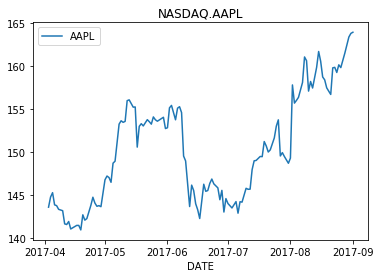

In [62]:
AAPL_df.plot()
plt.title("NASDAQ.AAPL")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


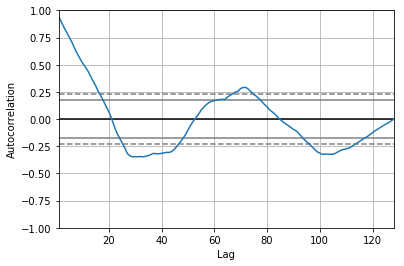

In [63]:
autocorrelation_plot(AAPL_df)
pyplot.show()

## ARIMA Model

In [64]:
# fit model
model = ARIMA(AAPL_df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

                             ARIMA Model Results                              
Dep. Variable:                 D.AAPL   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -245.843
Method:                       css-mle   S.D. of innovations              1.676
Date:                Wed, 22 May 2019   AIC                            505.686
Time:                        23:02:46   BIC                            525.595
Sample:                             1   HQIC                           513.775
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1606      0.135      1.186      0.238      -0.105       0.426
ar.L1.D.AAPL    -0.1219      0.088     -1.382      0.170      -0.295       0.051
ar.L2.D.AAPL    -0.0011      0.089     -0.01

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=145.887690, expected=147.970000
predicted=147.731310, expected=148.995000
predicted=149.439318, expected=149.040000
predicted=149.229874, expected=149.500000
predicted=149.636210, expected=149.480100
predicted=149.991433, expected=151.240000
predicted=151.240916, expected=150.730000
predicted=151.115419, expected=150.020000
predicted=150.220923, expected=150.270000
predicted=150.296441, expected=151.660000
predicted=151.806381, expected=153.030000
predicted=152.943644, expected=153.770000
predicted=153.819962, expected=149.560000
predicted=150.363315, expected=149.949900
predicted=149.917639, expected=149.500000
predicted=150.060065, expected=148.710000
predicted=148.727534, expected=149.310000
predicted=148.467196, expected=157.840000
predicted=157.065663, expected=155.720000
predicted=156.571426, expected=156.040000
predicted=155.988379, expected=156.390000
predicted=156.800846, expected=158.125000
predicted=157.984034, expected=161.100000
predicted=160.732910, expected=160

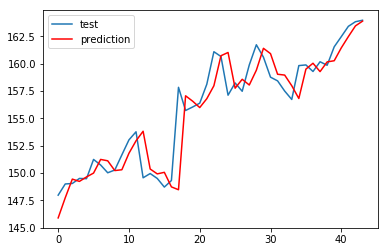

In [65]:
from sklearn.metrics import mean_squared_error

X = AAPL_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

## Analysis for NASDAQ.ADP

In [66]:
# Ceating the dataset for NASDAQ.ADP
ADP_df=df_new[['ADP']]
ADP_df.head()

,ADP
DATE,
2017-04-03,101.2200
2017-04-04,101.4799
2017-04-05,102.9801
2017-04-06,101.7700
2017-04-07,102.0400


In [67]:
ADP_df.describe()

,ADP
count,128.000000
mean,103.537859
std,4.470117
min,96.173300
25%,101.305000
50%,102.460000
75%,104.715000
max,119.540000


## Visualization of data

Text(0.5,1,'NASDAQ.ADP')

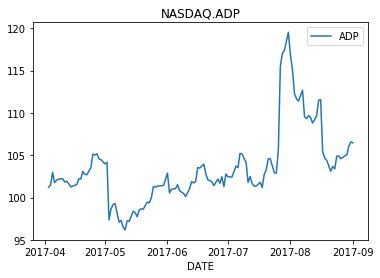

In [68]:
ADP_df.plot()
plt.title("NASDAQ.ADP")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


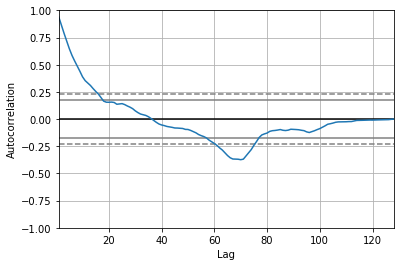

In [69]:
autocorrelation_plot(ADP_df)
pyplot.show()

## ARIMA Model

In [70]:
# fit model
model = ARIMA(ADP_df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

                             ARIMA Model Results                              
Dep. Variable:                  D.ADP   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -233.784
Method:                       css-mle   S.D. of innovations              1.525
Date:                Wed, 22 May 2019   AIC                            481.567
Time:                        23:05:14   BIC                            501.477
Sample:                             1   HQIC                           489.656
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.0397      0.138      0.288      0.774      -0.231       0.310
ar.L1.D.ADP     0.1104      0.088      1.253      0.213      -0.062       0.283
ar.L2.D.ADP     0.0036      0.089      0.040    

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=102.442044, expected=101.650000
predicted=101.678975, expected=101.350000
predicted=100.991874, expected=101.350000
predicted=101.479120, expected=101.800000
predicted=101.597696, expected=101.190000
predicted=101.255755, expected=102.730000
predicted=102.488650, expected=103.300000
predicted=103.327877, expected=104.580000
predicted=104.325817, expected=104.580000
predicted=104.920023, expected=102.930000
predicted=103.195570, expected=102.870000
predicted=103.029068, expected=105.620000
predicted=105.299462, expected=115.490000
predicted=116.087391, expected=117.055000
predicted=116.769941, expected=117.380000
predicted=116.271656, expected=119.540000
predicted=122.109240, expected=116.850000
predicted=116.566049, expected=115.160000
predicted=114.889913, expected=112.290000
predicted=112.079365, expected=111.680000
predicted=111.538099, expected=111.390000
predicted=111.900234, expected=112.687500
predicted=113.251801, expected=109.560000
predicted=109.639589, expected=109

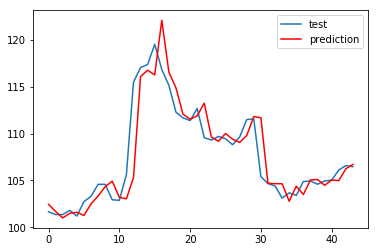

In [71]:
from sklearn.metrics import mean_squared_error

X = ADP_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

## Analysis for NASDAQ.CBOE

In [73]:
# Ceating the dataset for NASDAQ.AAP
CBOE_df=df_new[['CBOE']]
CBOE_df.head()

,CBOE
DATE,
2017-04-03,80.68
2017-04-04,80.59
2017-04-05,81.45
2017-04-06,80.23
2017-04-07,80.69


In [74]:
CBOE_df.describe()

,CBOE
count,128.000000
mean,89.410681
std,5.771025
min,80.230000
25%,84.057500
50%,89.280000
75%,93.542500
max,100.890000


## Visualization of data

Text(0.5,1,'NASDAQ.CBOE')

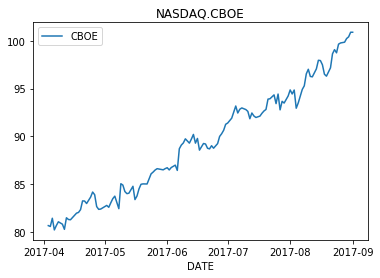

In [75]:
CBOE_df.plot()
plt.title("NASDAQ.CBOE")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


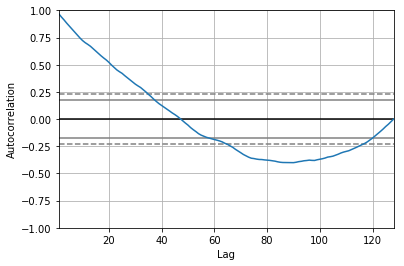

In [76]:
autocorrelation_plot(CBOE_df)
pyplot.show()

## ARIMA Model

In [77]:
# fit model
model = ARIMA(CBOE_df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

                             ARIMA Model Results                              
Dep. Variable:                 D.CBOE   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -125.931
Method:                       css-mle   S.D. of innovations              0.652
Date:                Wed, 22 May 2019   AIC                            265.862
Time:                        23:07:40   BIC                            285.771
Sample:                             1   HQIC                           273.951
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1597      0.038      4.174      0.000       0.085       0.235
ar.L1.D.CBOE    -0.2465      0.088     -2.786      0.006      -0.420      -0.073
ar.L2.D.CBOE    -0.1019      0.091     -1.12

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=92.295184, expected=92.450000
predicted=92.481015, expected=92.140000
predicted=92.174287, expected=91.980000
predicted=92.169625, expected=92.125000
predicted=92.199218, expected=92.420000
predicted=92.442872, expected=92.660000
predicted=92.660516, expected=92.820000
predicted=92.927237, expected=93.900000
predicted=93.777710, expected=93.940000
predicted=94.035498, expected=94.345000
predicted=94.559741, expected=93.430000
predicted=93.975800, expected=94.430000
predicted=94.493269, expected=92.780000
predicted=93.411702, expected=93.670000
predicted=93.593607, expected=93.490000
predicted=93.609687, expected=94.230000
predicted=93.977728, expected=94.861000
predicted=94.807082, expected=94.440000
predicted=94.782979, expected=94.850000
predicted=95.009808, expected=92.950000
predicted=93.840666, expected=93.500000
predicted=93.567719, expected=94.910000
predicted=94.469242, expected=95.290000
predicted=95.151133, expected=96.540000
predicted=96.253787, expected=97.020000


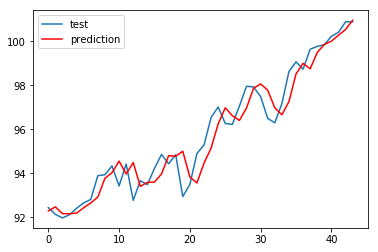

In [78]:
from sklearn.metrics import mean_squared_error

X = CBOE_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

## Analysis for NASDAQ.CSCO

In [79]:
# Ceating the dataset for NASDAQ.CSCO
CSCO_df=df_new[['CSCO']]
CSCO_df.head()

,CSCO
DATE,
2017-04-03,33.5200
2017-04-04,33.3550
2017-04-05,33.3600
2017-04-06,33.1050
2017-04-07,33.0894


In [80]:
CSCO_df.describe()

,CSCO
count,128.000000
mean,32.113947
std,0.988831
min,30.370000
25%,31.428000
50%,31.780500
75%,32.745000
max,34.390000


## Visualization of data

Text(0.5,1,'NASDAQ.CSCO')

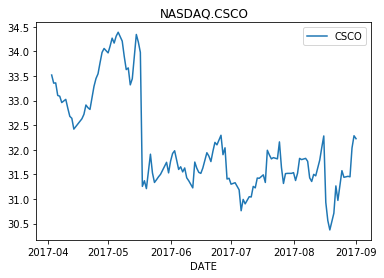

In [82]:
CSCO_df.plot()
plt.title("NASDAQ.CSCO")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


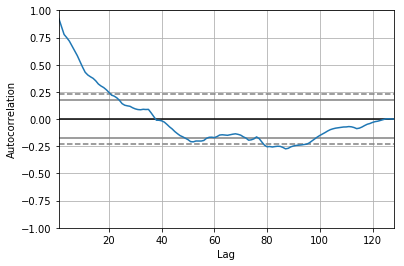

In [83]:
autocorrelation_plot(CSCO_df)
pyplot.show()

## ARIMA Model

In [84]:
# fit model
model = ARIMA(CSCO_df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

                             ARIMA Model Results                              
Dep. Variable:                 D.CSCO   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -43.273
Method:                       css-mle   S.D. of innovations              0.340
Date:                Wed, 22 May 2019   AIC                            100.546
Time:                        23:09:09   BIC                            120.455
Sample:                             1   HQIC                           108.635
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0108      0.027     -0.399      0.691      -0.064       0.042
ar.L1.D.CSCO     0.0002      0.088      0.003      0.998      -0.172       0.172
ar.L2.D.CSCO     0.0573      0.088      0.65

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=31.206326, expected=31.225000
predicted=31.220858, expected=31.425000
predicted=31.343182, expected=31.420000
predicted=31.447510, expected=31.490000
predicted=31.427051, expected=31.335000
predicted=31.329996, expected=31.990000
predicted=31.966046, expected=31.895000
predicted=32.023063, expected=31.815000
predicted=31.543326, expected=31.840000
predicted=31.875604, expected=31.815000
predicted=31.925908, expected=32.160000
predicted=32.110219, expected=31.640000
predicted=31.668058, expected=31.315000
predicted=31.115183, expected=31.515000
predicted=31.660202, expected=31.520000
predicted=31.651600, expected=31.520000
predicted=31.320472, expected=31.535000
predicted=31.475295, expected=31.375000
predicted=31.390652, expected=31.524500
predicted=31.482180, expected=31.825000
predicted=31.871209, expected=31.800000
predicted=31.752775, expected=31.825000
predicted=31.691455, expected=31.765000
predicted=31.805664, expected=31.429000
predicted=31.447596, expected=31.355000


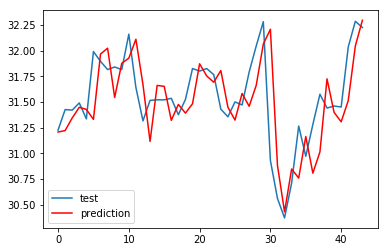

In [85]:
from sklearn.metrics import mean_squared_error

X = CSCO_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

## Analysis for NASDAQ.EBAY

In [87]:
# Ceating the dataset for NASDAQ.EBAY
EBAY_df=df_new[['EBAY']]
EBAY_df.head()

,EBAY
DATE,
2017-04-03,33.440
2017-04-04,34.211
2017-04-05,34.375
2017-04-06,33.940
2017-04-07,34.005


In [88]:
EBAY_df.describe()

,EBAY
count,128.000000
mean,34.792420
std,1.104187
min,31.890000
25%,34.079975
50%,34.787500
75%,35.582500
max,37.200000


## Visualization of data

Text(0.5,1,'NASDAQ.EBAY')

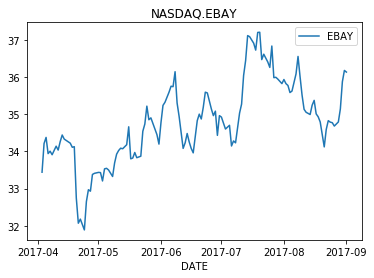

In [89]:
EBAY_df.plot()
plt.title("NASDAQ.EBAY")

C:\Users\Satish\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


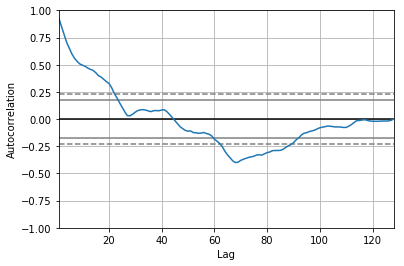

In [90]:
autocorrelation_plot(EBAY_df)
pyplot.show()

## ARIMA Model

In [91]:
# fit model
model = ARIMA(EBAY_df, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: Futu

                             ARIMA Model Results                              
Dep. Variable:                 D.EBAY   No. Observations:                  127
Model:                 ARIMA(5, 1, 0)   Log Likelihood                 -56.630
Method:                       css-mle   S.D. of innovations              0.378
Date:                Wed, 22 May 2019   AIC                            127.259
Time:                        23:11:22   BIC                            147.169
Sample:                             1   HQIC                           135.348
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0200      0.033      0.609      0.544      -0.044       0.085
ar.L1.D.EBAY     0.0797      0.090      0.887      0.377      -0.096       0.256
ar.L2.D.EBAY     0.0283      0.089      0.31

C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\Satish\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an a

predicted=36.114014, expected=36.440000
predicted=36.434248, expected=37.110000
predicted=37.174730, expected=37.080000
predicted=37.080130, expected=36.905000
predicted=36.820925, expected=36.720000
predicted=36.607920, expected=37.195000
predicted=37.216860, expected=37.200000
predicted=37.302265, expected=36.465000
predicted=36.474003, expected=36.610000
predicted=36.591388, expected=36.400000
predicted=36.381542, expected=36.255000
predicted=36.336242, expected=36.830000
predicted=36.928353, expected=35.980000
predicted=36.033970, expected=35.990000
predicted=36.014100, expected=35.940000
predicted=35.856880, expected=35.820000
predicted=35.936219, expected=35.930000
predicted=35.970522, expected=35.820000
predicted=35.848786, expected=35.770000
predicted=35.805708, expected=35.580000
predicted=35.572948, expected=35.620000
predicted=35.639856, expected=36.080000
predicted=36.126974, expected=36.550000
predicted=36.662620, expected=36.010000
predicted=36.052495, expected=35.510000


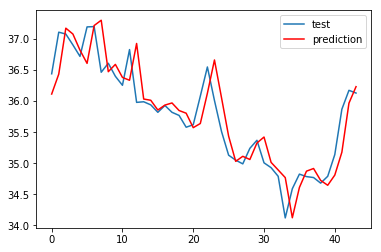

In [92]:
from sklearn.metrics import mean_squared_error

X = EBAY_df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()